<a href="https://colab.research.google.com/github/hussnain060/O-bhains/blob/main/data_access.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gspread
from gspread_dataframe import get_as_dataframe,set_with_dataframe
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

***When below section run ... a url show click on url and login with your account it... copy sign in key and paste it into text box and press enter***


In [ ]:
sheet_url = "https://docs.google.com/spreadsheets/d/1AJSGHiLQvwlPYY7RPyS7nlYwLmof70DC-NVHT-o7QtE/edit?usp=drivesdk"
sheet_id = gc.open_by_url(sheet_url)

In [ ]:
ws = sheet_id.worksheet("Sheet1")

# **Google sheet Data**

In [ ]:
sheet1_df = get_as_dataframe(ws)
sheet1_df = sheet1_df.iloc[:,:6]
sheet1_df = sheet1_df.dropna()
sheet1_df

,date,time,temperature,x_axix,y_axix,z_axix
0,10/09/2021,10:38:32 AM,95.23,5.35,-1.26,-8.01
1,10/09/2021,10:38:34 AM,96.13,5.37,-1.44,-7.61
2,10/09/2021,10:38:36 AM,95.13,6.11,-1.91,-7.12
3,10/09/2021,10:38:38 AM,95.67,5.94,-1.28,-7.02
4,10/09/2021,10:38:40 AM,95.70,5.88,-1.65,-7.34
...,...,...,...,...,...,...
4743,10/09/2021,2:21:25 PM,97.65,-6.10,-1.81,-6.82
4744,10/09/2021,2:21:27 PM,97.54,-6.99,-1.39,-7.14
4745,10/09/2021,2:21:29 PM,97.39,-6.03,-1.93,-6.90
4746,10/09/2021,2:21:31 PM,97.18,-6.04,-0.23,-7.39


# **Download DataFrame as CSV file**

In [ ]:
sheet1_df.to_csv('file3.csv', index=False)

In [ ]:
sheet1_df.info()

# **Average Temperature and movement of cow per day**

In [ ]:
date_df = sheet1_df['date'].drop_duplicates()
days_temperature_avg = []
days_X_axis_avg = []
days_Y_axis_avg = []
days_Z_axis_avg = []
for x in date_df:
  days_data = sheet1_df.loc[sheet1_df['date'] == x]
  days_temperature_avg.append(days_data['temperature'].sum()/len(days_data['temperature']))
  days_X_axis_avg.append(days_data['x_axix'].sum()/len(days_data['x_axix']))
  days_Y_axis_avg.append(days_data['y_axix'].sum()/len(days_data['y_axix']))
  days_Z_axis_avg.append(days_data['z_axix'].sum()/len(days_data['z_axix']))


df = pd.DataFrame({
    'Date': date_df,
    'Temperature_avg': days_temperature_avg,
    'X_axis_avg': days_X_axis_avg,
    'Y_axis_avg': days_Y_axis_avg,
    'Z_axis_avg': days_Z_axis_avg
  })
df = df.round(2)

# **Final dataset**

In [ ]:
df

,Date,Temperature_avg,X_axis_avg,Y_axis_avg,Z_axis_avg
0,10/09/2021,95.87,-0.54,-0.59,-7.08


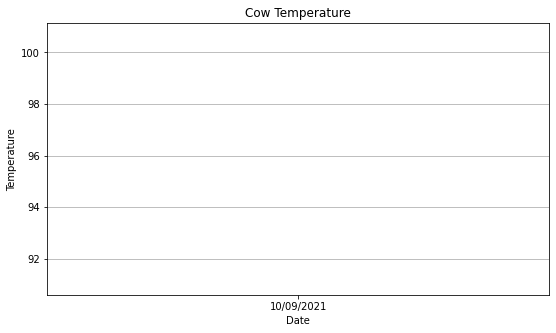

In [ ]:
x = df['Date']
y = df['Temperature_avg']
plt.figure(figsize=(9,5))
plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title("Cow Temperature")
plt.grid(axis='y')

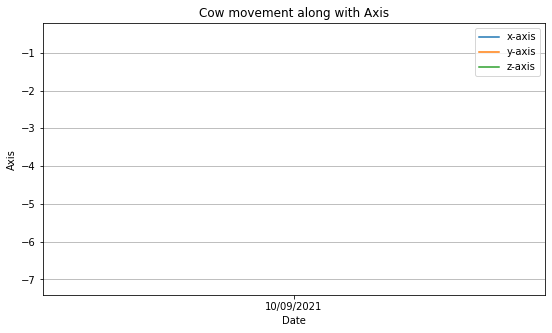

In [ ]:
tt = df['Date']
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(tt, df.X_axis_avg, label='x-axis')
ax.plot(tt,df.Y_axis_avg, label='y-axis')
ax.plot(tt,df.Z_axis_avg, label='z-axis')
ax.set_xlabel("Date")
ax.set_ylabel("Axis")
ax.set_title("Cow movement along with Axis")
ax.grid(axis='y')
ax.legend()

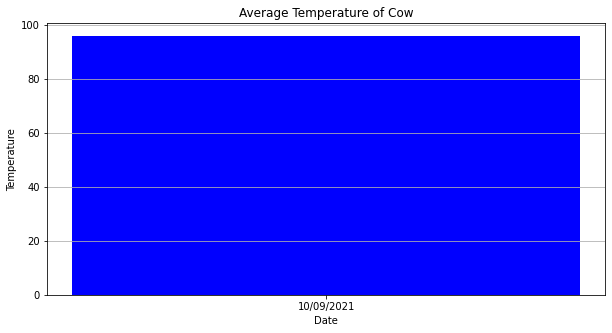

In [ ]:
date_per_day = list(df['Date'])
temperature = list(df['Temperature_avg'])
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(date_per_day, temperature, color ='blue',
        width = 0.4)
 
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Average Temperature of Cow")
plt.grid(axis='y')
plt.show()